# Klasyfikacja

In [13]:
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn import preprocessing

## Narysujmy iris data

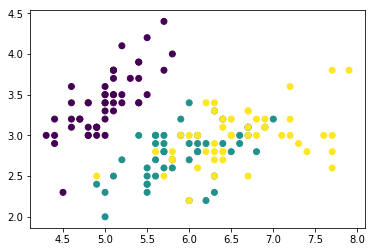

In [14]:
# import some data to play with
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features.
y = iris.target
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()

## Wybierz dwie klasy z danych iris data (0,1). Zauważ, że są liniowo separowalne. Wykonaj klasyfikacje liniową za pomocą SVM z różnymi parametrami C. Wyznacz granicę decyzyjną dokonując predykcji na gridzie.

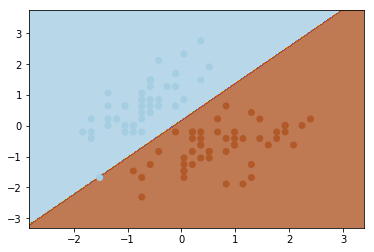

In [15]:
# import some data to play with
iris = datasets.load_iris()
X = iris.data[iris.target!=2, :2]  # we only take the first two features and two classes

scaler = preprocessing.StandardScaler().fit(X)
X = scaler.transform(X)
 
y = iris.target[iris.target!=2]

C = 1.0  # SVM regularization parameter
svc = svm.SVC(kernel='linear', C=C).fit(X, y)
# create a mesh to plot in
h = .02  # step size in the mesh
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
plt.show()

## Wybierz dwie klasy z danych iris data (1,2). Zauważ, że NIE są liniowo separowalne. Wykonaj klasyfikacje liniową za pomocą SVM z różnymi parametrami C. Wyznacz granicę decyzyjną dokonując predykcji na gridzie.

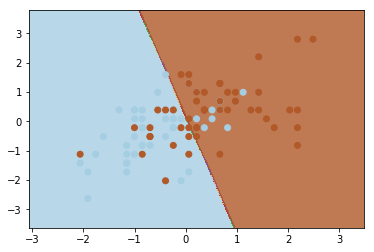

In [54]:
# import some data to play with
iris = datasets.load_iris()
X = iris.data[iris.target!=0, :2]  # we only take the first two features and two classes 

scaler = preprocessing.StandardScaler().fit(X)
X = scaler.transform(X)

y = iris.target[iris.target!=0]

C = 1.0  # SVM regularization parameter
svc = svm.SVC(kernel='linear', C=C).fit(X, y)
# create a mesh to plot in
h = .02  # step size in the mesh
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
plt.show()

# Wykonaj klasyfikację za pomocą SVM z jądrem rbf. Wykonaj ją dla różnych parametrów C oraz gamma. Narysuj płaszczyznę rozdzielającą.

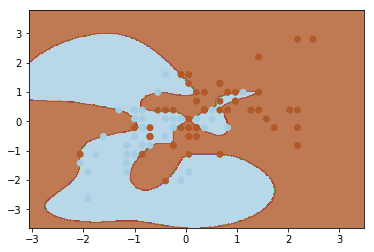

In [25]:
# import some data to play with
iris = datasets.load_iris()
X = iris.data[iris.target!=0, :2]  # we only take the first two features and two classes 

scaler = preprocessing.StandardScaler().fit(X)
X = scaler.transform(X)

y = iris.target[iris.target!=0]

#C = 1.0  # SVM regularization parameter
#C = 10.0
#C = 100.0
C = 1000000.0
svc = svm.SVC(kernel='rbf', gamma=0.7, C=C).fit(X, y)
# create a mesh to plot in
h = .02  # step size in the mesh
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
plt.show()


In [26]:
#Zobaczmy na dokładność modelu
Y_test_predicted = svc.predict(X)
print("Dokładność modelu wytrenowanego to: ",100*sklearn.metrics.accuracy_score(y, Y_test_predicted), "%")

Dokładność modelu wytrenowanego to:  88.0 %


# Nigdy nie testuj poprawności klasyfikacji na zbiorze treningowym (overfitting) 

Podziel zbiór danych na dane testowe i treningowy.

(150, 4) (150,)
[ 5.1  3.5  1.4  0.2] 0


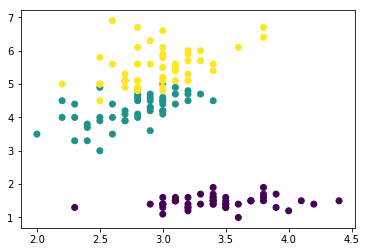

(112, 2) (112,)


In [27]:
from sklearn import datasets
iris = datasets.load_iris()
X_iris, y_iris = iris.data, iris.target
print(X_iris.shape, y_iris.shape)
print(X_iris[0], y_iris[0])
plt.scatter(X_iris[:,1],X_iris[:,2],c=y_iris)
plt.show()

from sklearn.cross_validation import train_test_split
from sklearn import preprocessing
# Get dataset with only the first two attributes
X, y = X_iris[:, :2], y_iris
# Split the dataset into a training and a testing set
# Test set will be the 25% taken randomly
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=33)
print(X_train.shape, y_train.shape)
# Standardize the features
scaler = preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [36]:
C = 1  # SVM regularization parameter
#C = 10  
#C = 100  
#C = 1000  
clf = svm.SVC(kernel='rbf', gamma=0.7, C=C).fit(X_train, y_train)
#Zobaczmy na dokładność modelu
Y_test_predicted = clf.predict(X_test)
print("Dokładność modelu wytrenowanego to: ",100*sklearn.metrics.accuracy_score(y_test, Y_test_predicted), "%")

Dokładność modelu wytrenowanego to:  68.4210526316 %


# Wykonaj klasyfikację za pomocą Cross-Validation.

In [55]:
## from sklearn import svm, datasets
from sklearn.model_selection import GridSearchCV
iris = datasets.load_iris()
parameters = {'kernel':('linear', 'rbf'), 'C':[0.01, 0.1, 1, 10, 100, 1000]}
svc = svm.SVC()
clf = GridSearchCV(svc, parameters)
clf.fit(X_train, y_train)
                            

GridSearchCV(cv=None, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'kernel': ('linear', 'rbf'), 'C': [0.01, 0.1, 1, 10, 100, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [56]:
clf.best_estimator_

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [57]:
#Zobaczmy na dokładność modelu
Y_test_predicted = clf.best_estimator_.predict(X_test)
print("Dokładność modelu wytrenowanego to: ",100*sklearn.metrics.accuracy_score(y_test, Y_test_predicted), "%")

Dokładność modelu wytrenowanego to:  68.4210526316 %
